# Multivariate Linear Regression on DFT_SMC - All Data

- Dataset: DFT_SMC, 90 of the ligands
- x = Multivariates, Selected Features
- y = Yields from rxn II, Sam's paper

Data preparation

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import DataStructs
from rdkit import Chem
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions

In [2]:
# data
import pandas as pd
from rdkit import Chem
#from rxn_yields.data import generate_buchwald_hartwig_rxns
#df = pd.read_excel('../data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx', sheet_name='FullCV_01')
df_origin = pd.read_excel('smc_data.xlsx', sheet_name='DFT_SMC')
df_origin = df_origin.sample(frac=1,random_state=42)
df_x = df_origin.drop(columns = ['SMILES','ID','ID.1','Unnamed: 0','y1','y2','y3','y4'])
df_x = df_x.drop(columns = ['y5','y6','y7','y8','y9','y10','y11','y12'])
df_x = df_x.drop(columns = ['y13','y14','y15','y16','y17','y18','y19','buch'])
df_x = df_x.drop(columns = ['x198','x199','x200','x201','x202','Unnamed: 110'])
df_y = df_origin[['x198']]

In [3]:
print('Shape of input:',df_x.shape,'\nShape of output:' ,df_y.shape)
df_x = df_x.astype(float)
df_y = df_y.astype(float)
df_x.to_excel("output.xlsx") 

Shape of input: (90, 198) 
Shape of output: (90, 1)


Permutation for 3 features

In [4]:
# permutations using library function !!not successful
from itertools import permutations 

perm = permutations(df_x.columns)
print(perm)

Visualization - three features

In [5]:
def plot_three_features(df_x,i,j,k):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],color="red")
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    plt.show()

A plot of axis: x4 x51 , and  x182


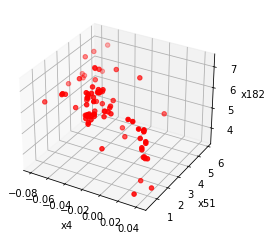

In [38]:
plot_three_features(df_x,'x4','x51','x182')

In [7]:
#This allows you to plot the 3d diagram of 2 features selected +1 feature from all features
for i in df_x.columns:
    #plot_three_features(df_x,i)
    continue

Splitting dataset

In [8]:
#Splitting dataset
train_x = df_x[:(int((len(df_x)*0.79)))]
train_y = df_y[:(int((len(df_x)*0.79)))]
test_x = df_x[(int((len(df_x)*0.79))):]
test_y = df_y[(int((len(df_x)*0.79))):]
print(train_x.shape)

(71, 198)


In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x1 = np.array(train_x[["x1"]])
train_x2 = np.array(train_x[["x2"]])
regr.fit(train_x,train_y)

LinearRegression()

# MLR - with all features

In [10]:
#Not using this package
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_x)

In [11]:
def linear_reg_of_n_features(df_x,df_y):
    reg=linear_model.LinearRegression()     #initiating linearregression
    model = reg.fit(df_x,df_y)
    Intercept=reg.intercept_
    Coefficients=reg.coef_
    return Intercept, Coefficients, model
    

In [12]:
Intercept, Coefficients, model = linear_reg_of_n_features(train_x,train_y)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg_predictions = model.predict(train_x)
reg_mse = mean_squared_error(train_y, reg_predictions)
reg_rmse = np.sqrt(reg_mse)
print("Training set RMSE:",reg_rmse)

reg_predictions2 = model.predict(test_x)
reg_mse2 = mean_squared_error(test_y, reg_predictions2)
reg_rmse2 = np.sqrt(reg_mse2)
print("Test set RMSE:",reg_rmse2)

r2_score2=r2_score(train_y, reg_predictions)
print("Training set R^2:",r2_score2)
r2_score3=r2_score(test_y, reg_predictions2)
print("Test set R^2:",r2_score3)

Training set RMSE: 2.0581188728926753e-12
Test set RMSE: 82.87173752320409
Training set R^2: 1.0
Test set R^2: -9.176787764949449


In [14]:
print("Intercept:",Intercept,"Coefficient:",Coefficients)

Intercept: [254.77216286] Coefficient: [[-9.78110040e-03 -3.39058595e-01  7.24107821e-03  2.00860810e-01
   1.04050943e-01  1.93619728e-01 -1.18960806e-01  2.42689347e-01
  -2.91763541e-01 -8.42118624e-02 -2.61499562e-02  8.32596777e-02
   7.21245731e-01  1.13062180e+00  4.52574882e-02  8.86147599e-01
  -4.05341176e-01 -3.44778058e-01 -1.71965909e-01 -9.39774247e-03
   1.73129568e-01 -1.63729043e-01 -3.80727362e-02  3.67929061e+00
  -6.59915157e+00  1.52907831e-01  2.37163157e-02 -1.10940968e-02
  -1.49771174e-02  1.17070941e-01  2.76853915e-02  1.53990198e-01
   7.89849531e-02 -1.31657003e-01 -5.76152146e-02  1.99643151e+00
  -1.68285917e+00  1.42304872e-02  2.28015537e-01 -5.80619087e-02
   8.05457590e-01 -2.39776629e-01  1.56381591e-01 -6.78239120e+00
  -3.14261131e+00  1.94662652e+00  1.73202098e+00 -3.85576882e-02
  -1.27662104e+00  1.67514567e-01 -7.44757435e+00 -3.49508048e-01
  -3.67526708e+00 -3.32575905e+00  3.82816547e+00  3.41852663e+00
   2.02200603e+00  4.32598853e+00  2.

# MLR - with 3 features

In [15]:
def linear_reg_of_3_features(df_x,df_y,i,j,k):
    df_3f = df_x[[i,j,k]]
    reg=linear_model.LinearRegression()     #initiating linearregression
    model = reg.fit(df_3f,df_y)
    Intercept=reg.intercept_
    Coefficients=reg.coef_
    return Intercept, Coefficients, model
    

In [16]:
def evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,i,j,k):
    reg_predictions = model.predict(train_x[[i,j,k]])
    train_mse = mean_squared_error(train_y, reg_predictions)
    train_rmse = "{:.2f}".format(np.sqrt(train_mse))

    reg_predictions2 = model.predict(test_x[[i,j,k]])
    test_mse = mean_squared_error(test_y, reg_predictions2)
    test_rmse = "{:.2f}".format(np.sqrt(test_mse))

    train_r2="{:.2f}".format(r2_score(train_y, reg_predictions))
    test_r2="{:.2f}".format(r2_score(test_y, reg_predictions2))
    return train_rmse, test_rmse, train_r2, test_r2

In [17]:
def evaluate_model_of_n_features(train_x,train_y,test_x,test_y,model):
    reg_predictions = model.predict(train_x)
    train_mse = mean_squared_error(train_y, reg_predictions)
    train_rmse = "{:.2f}".format(np.sqrt(train_mse))

    reg_predictions2 = model.predict(test_x)
    test_mse = mean_squared_error(test_y, reg_predictions2)
    test_rmse = "{:.2f}".format(np.sqrt(test_mse))

    train_r2="{:.2f}".format(r2_score(train_y, reg_predictions))
    test_r2="{:.2f}".format(r2_score(test_y, reg_predictions2))
    return train_rmse, test_rmse, train_r2, test_r2

In [18]:
#Combination of all columns from dataframe
def all_features(df):
    all_features = df.columns.values.tolist()
    return all_features

In [19]:
#This code actually generate a real combination of 3 features, but it just... contains too many for loops
all_feat = all_features(df_x)
def combination_any_3_features(all_feat):
    comb_3_feat = []
    for i in all_feat:
        for j in all_feat:
            for k in all_feat:
                if i!=j and j!=k and k!=i:
                    comb_3_feat.append([i,j,k])
        
    return comb_3_feat

In [20]:
def combination_any_2_features(all_feat,preset_feat):
    comb_2_feat = []
    for i in all_feat:
        for j in all_feat:
            if i!=j and i!=preset_feat and j!=preset_feat:
                comb_2_feat.append([preset_feat,i,j])
        
    return comb_2_feat

In [21]:
feats = combination_any_2_features(df_x,'x30')

In [22]:
all_feat.index('x1')

0

Do not re-do the feature combination generation because it cost time

In [23]:
#x1x2x3 x2x3x4 x3x4x5... a 'combination' that has 190~ elements so that I try things that aren't computational demanding
def fake_combination_any_3_features(df):
    comb_3_feat = []
    k="x1"
    for i in df.columns:
        while k != 'x197':
            j = df.columns[df.columns.get_loc(i)+1]
            k = df.columns[df.columns.get_loc(j)+1]
            if i !=j and j!=k and i!=k:
                print(i,j,k)
                comb_3_feat.append([i,j,k])
                i = df.columns[df.columns.get_loc(i)+1]
    return comb_3_feat

        

In [24]:
#df_x_set = combination_any_3_features(df_x)
#Run time: 24s

In [25]:
#Write down combination of any 3 features into a txt
#Txt already generated
"""
with open(r'all_features.txt', 'w') as fp:
    for item in df_x_set:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')
"""

'\nwith open(r\'all_features.txt\', \'w\') as fp:\n    for item in df_x_set:\n        # write each item on a new line\n        fp.write("%s\n" % item)\n    print(\'Done\')\n'

In [26]:
#Early attemps - trying to use mlr from math formular
"""
def hypothesis(theta, X):
    return theta*X
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            print(theta[c])
            theta[c] = theta[c] - alpha*(((y1.sum()-y.sum())*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta
"""

'\ndef hypothesis(theta, X):\n    return theta*X\ndef computeCost(X, y, theta):\n    y1 = hypothesis(theta, X)\n    y1=np.sum(y1, axis=1)\n    return sum(np.sqrt((y1-y)**2))/(2*47)\ndef gradientDescent(X, y, theta, alpha, i):\n    J = []  #cost function in each iterations\n    k = 0\n    while k < i:        \n        y1 = hypothesis(theta, X)\n        y1 = np.sum(y1, axis=1)\n        for c in range(0, len(X.columns)):\n            print(theta[c])\n            theta[c] = theta[c] - alpha*(((y1.sum()-y.sum())*X.iloc[:,c])/len(X))\n        j = computeCost(X, y, theta)\n        J.append(j)\n        k += 1\n    return J, j, theta\n'

# Screening over 3 features - 1 fixed + combination with 2

Features Combination - feats, a list, len(list) lines, each line with n number of features

In [27]:
# 1 pre-determined feature + all combination of 2 features = 3 features total
# df_x and train_x are both okay here... because the columns are the same
feats = combination_any_2_features(df_x,'x30')

In [28]:
# Numbers of combinations (197*196)
len(feats)

38612

In [29]:
print('----------Linear regression of 3 features starts----------')
List_r2_4 = []
List_r2_3 = []
List_r2_2 = []
for m in feats:
    i = feats.index(m)
    Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
    #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
    #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    if float(test_r2) >=0.4: 
        print('Significant!')
        print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    elif float(test_r2) >=0.3:
        List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])
        

----------Linear regression of 3 features starts----------


KeyboardInterrupt: 

In [ ]:
#To test with fake combination of 3 features
feats = fake_combination_any_3_features(df_x)

In [ ]:
feats = fake_combination_any_3_features(df_x)
print('----------Linear regression of 3 features starts----------')
List_r2_4 = []
List_r2_3 = []
List_r2_2 = []
for m in feats:
    i = feats.index(m)
    Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
    #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
    #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    if float(test_r2) >=0.2: 
        print('Significant!')
        print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    elif float(test_r2) >=0.3:
        List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])

----------Linear regression of 3 features starts----------
Significant!
For features x30 x31 x32 : Intercept: [-1842.46923173] , Coefficient:  [[-940.07239826 1391.17380323  903.32490096]]
Training rmse: 22.06 
Test rmse:  22.93 
Training r2: 0.20 
Test r2:  0.22
Significant!
For features x35 x36 x37 : Intercept: [63.20085272] , Coefficient:  [[-1308.28954076    -2.55975173     4.1837741 ]]
Training rmse: 20.97 
Test rmse:  22.62 
Training r2: 0.27 
Test r2:  0.24
Significant!
For features x49 x50 x51 : Intercept: [324.68586013] , Coefficient:  [[-7.69266530e-02 -3.37748975e+02 -9.81625572e+00]]
Training rmse: 20.43 
Test rmse:  23.22 
Training r2: 0.31 
Test r2:  0.20
Significant!
For features x178 x179 x180 : Intercept: [38.38523429] , Coefficient:  [[-37.1727327   39.00194979  29.89253704]]
Training rmse: 21.13 
Test rmse:  21.87 
Training r2: 0.26 
Test r2:  0.29


In [ ]:
def combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y):
    print('----------Linear regression of 3 features starts----------')
    List_r2_4 = []
    List_r2_3 = []
    #List_r2_2 = []
    for m in feats:
        i = feats.index(m)
        Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
        #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
        #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        if float(test_r2) >=0.4: 
            print('Significant!')
            print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
            print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
            List_r2_4.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.3:
            List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])
    return List_r2_4,List_r2_3

Screening of some features that are significant from fake combination of 3 features

In [ ]:
# Don't use df_x and df_y, they are not splitted. Use train_x and etc
feats = combination_any_2_features(df_x,'x49')
List_r2_4_x49,List_r2_3_x49 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)


----------Linear regression of 3 features starts----------


In [ ]:
feats = combination_any_2_features(df_x,'x178')
List_r2_4_x178,List_r2_3_x178 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
feats = combination_any_2_features(df_x,'x35')
List_r2_4_x35,List_r2_3_x35 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x35 x37 x172 : Intercept: [19.28717798] , Coefficient:  [[-1390.67597724     2.54903254     9.87396915]]
Training rmse: 20.02 
Test rmse:  19.56 
Training r2: 0.34 
Test r2:  0.43
Significant!
For features x35 x53 x172 : Intercept: [39.91141944] , Coefficient:  [[-1544.16532371    -3.56762692     6.5582802 ]]
Training rmse: 20.06 
Test rmse:  20.17 
Training r2: 0.34 
Test r2:  0.40
Significant!
For features x35 x58 x172 : Intercept: [31.243451] , Coefficient:  [[-1.48608994e+03 -7.72214639e-01  7.39365590e+00]]
Training rmse: 20.16 
Test rmse:  20.09 
Training r2: 0.33 
Test r2:  0.40
Significant!
For features x35 x61 x172 : Intercept: [21.72075633] , Coefficient:  [[-1326.68908497    -1.58668615     7.83117849]]
Training rmse: 20.26 
Test rmse:  20.11 
Training r2: 0.32 
Test r2:  0.40
Significant!
For features x35 x63 x172 : Intercept: [28.69880096] , Coefficient:  [[-1.45423516e+03 -9.41082945e-01 

In [ ]:
feats = combination_any_2_features(df_x,'x180')
List_r2_4_x177,List_r2_3_x35 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x180 x30 x177 : Intercept: [-20.85603487] , Coefficient:  [[ 28.26281926 391.61393318 -40.08197736]]
Training rmse: 20.25 
Test rmse:  20.03 
Training r2: 0.32 
Test r2:  0.41
Significant!
For features x180 x31 x177 : Intercept: [-52.03852887] , Coefficient:  [[ 24.28674717 570.55041149 -38.47302772]]
Training rmse: 19.67 
Test rmse:  19.63 
Training r2: 0.36 
Test r2:  0.43
Significant!
For features x180 x79 x177 : Intercept: [69.69694295] , Coefficient:  [[  42.8765244  -291.18618682  -56.30173148]]
Training rmse: 19.85 
Test rmse:  19.96 
Training r2: 0.35 
Test r2:  0.41
Significant!
For features x180 x84 x177 : Intercept: [77.7234082] , Coefficient:  [[ 44.49622416  -2.57491357 -59.88447455]]
Training rmse: 19.94 
Test rmse:  19.75 
Training r2: 0.34 
Test r2:  0.42
Significant!
For features x180 x146 x177 : Intercept: [34.84549876] , Coefficient:  [[ 34.37444657  -0.5619785  -39.51938773]]
Traini

In [ ]:
feats = combination_any_2_features(df_x,'x177')
List_r2_4_x177,List_r2_3_x177 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x177 x17 x31 : Intercept: [-21.12927523] , Coefficient:  [[-2.28741912e+01 -1.26958939e-01  7.92177175e+02]]
Training rmse: 20.89 
Test rmse:  20.06 
Training r2: 0.28 
Test r2:  0.40
Significant!
For features x177 x24 x31 : Intercept: [-30.08507056] , Coefficient:  [[-21.44997971  -1.22707999 582.26135379]]
Training rmse: 20.70 
Test rmse:  20.01 
Training r2: 0.29 
Test r2:  0.41
Significant!
For features x177 x30 x180 : Intercept: [-20.85603487] , Coefficient:  [[-40.08197736 391.61393318  28.26281926]]
Training rmse: 20.25 
Test rmse:  20.03 
Training r2: 0.32 
Test r2:  0.41
Significant!
For features x177 x31 x17 : Intercept: [-21.12927523] , Coefficient:  [[-2.28741912e+01  7.92177175e+02 -1.26958939e-01]]
Training rmse: 20.89 
Test rmse:  20.06 
Training r2: 0.28 
Test r2:  0.40
Significant!
For features x177 x31 x24 : Intercept: [-30.08507056] , Coefficient:  [[-21.44997971 582.26135379  -1.227

In [ ]:
feats = combination_any_2_features(df_x,'x50')
List_r2_4_x50,List_r2_3_x50 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x50 x53 x91 : Intercept: [185.45631765] , Coefficient:  [[-131.31838112   -4.65993568   -4.38582897]]
Training rmse: 20.79 
Test rmse:  19.73 
Training r2: 0.29 
Test r2:  0.42
Significant!
For features x50 x58 x86 : Intercept: [186.69240345] , Coefficient:  [[-172.2586861    -1.13260198   -0.34666541]]
Training rmse: 20.48 
Test rmse:  20.02 
Training r2: 0.31 
Test r2:  0.41
Significant!
For features x50 x58 x91 : Intercept: [208.12634274] , Coefficient:  [[-162.81202137   -1.20140295   -4.14224119]]
Training rmse: 20.56 
Test rmse:  19.59 
Training r2: 0.30 
Test r2:  0.43
Significant!
For features x50 x58 x141 : Intercept: [206.61530012] , Coefficient:  [[-162.44955788   -1.16860018   -0.83882446]]
Training rmse: 20.33 
Test rmse:  20.03 
Training r2: 0.32 
Test r2:  0.41
Significant!
For features x50 x58 x156 : Intercept: [188.25500623] , Coefficient:  [[-2.00306270e+02 -1.11055842e+00 -1.46041663

In [ ]:
feats = combination_any_2_features(df_x,'x172')
List_r2_4_x172,List_r2_3_x172 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x172 x34 x37 : Intercept: [2.86559943] , Coefficient:  [[   9.69855356 -788.57220113    2.74662803]]
Training rmse: 20.79 
Test rmse:  20.18 
Training r2: 0.29 
Test r2:  0.40
Significant!
For features x172 x35 x37 : Intercept: [19.28717798] , Coefficient:  [[    9.87396915 -1390.67597724     2.54903254]]
Training rmse: 20.02 
Test rmse:  19.56 
Training r2: 0.34 
Test r2:  0.43
Significant!
For features x172 x35 x53 : Intercept: [39.91141944] , Coefficient:  [[    6.5582802  -1544.16532371    -3.56762692]]
Training rmse: 20.06 
Test rmse:  20.17 
Training r2: 0.34 
Test r2:  0.40
Significant!
For features x172 x35 x58 : Intercept: [31.243451] , Coefficient:  [[ 7.39365590e+00 -1.48608994e+03 -7.72214639e-01]]
Training rmse: 20.16 
Test rmse:  20.09 
Training r2: 0.33 
Test r2:  0.40
Significant!
For features x172 x35 x61 : Intercept: [21.72075633] , Coefficient:  [[    7.83117849 -1326.68908497    -1.

# Evaluation and Cross validation with any selection of features

In [30]:
from sklearn.model_selection import cross_val_score


In [31]:
# This program auto - split the data, so safe to use df_x and df_y as input. 
# Make sure to cut df_x beforehand into a df with chosen amount of features.
def fold_5_cross_validation(df_x,df_y):
    train_x = df_x[:(int((len(df_x)*0.79)))]
    train_y = df_y[:(int((len(df_x)*0.79)))]
    test_x = df_x[(int((len(df_x)*0.79))):]
    test_y = df_y[(int((len(df_x)*0.79))):]
    Intercept, Coefficients, regg = linear_reg_of_n_features(train_x,train_y)
    print('Intercept:',Intercept,', Coefficient: ',Coefficients)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_n_features(train_x,train_y,test_x,test_y,regg)
    print('Training set RMSE:',train_rmse, '\nTest set RMSE: ',test_rmse, '\nTraining set R^2:',train_r2, '\nTest set R^2: ',test_r2 )
    cvd_scores = cross_val_score(regg, df_x, df_y, cv=5)
    print('5 fold Cross Validation score: ',cvd_scores)

In [32]:
df_3f = df_x[['x30','x180','x177']]
fold_5_cross_validation(df_3f,df_y)

Intercept: [-20.85603487] , Coefficient:  [[391.61393318  28.26281926 -40.08197736]]
Training set RMSE: 20.25 
Test set RMSE:  20.03 
Training set R^2: 0.32 
Test set R^2:  0.41
5 fold Cross Validation score:  [0.07737853 0.34024521 0.37465143 0.16026038 0.40255248]


A plot of axis: x30 x180 , and  x177


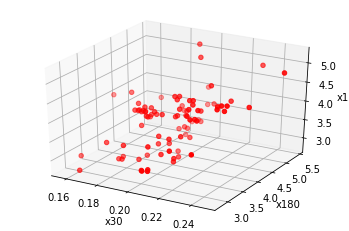

In [ ]:
plot_three_features(df_x,'x30','x180','x177')

In [ ]:
df_4f = df_x[['x30','x180','x177','x172']]
fold_5_cross_validation(df_4f,df_y)

Intercept: [-24.09778173] , Coefficient:  [[325.14520479  21.70147836 -38.45831566   4.86528943]]
Training set RMSE: 19.47 
Test set RMSE:  19.51 
Training set R^2: 0.37 
Test set R^2:  0.44
5 fold Cross Validation score:  [0.09670983 0.39207169 0.37116572 0.26579056 0.43196593]


Best combination of features in Sigman's code: x180, x24, x25, x29, x40, x57, x70

In [ ]:
df_7f = df_x[['x24','x180','x25','x29','x40','x57','x70']]
fold_5_cross_validation(df_7f,df_y)

Intercept: [-236.23785444] , Coefficient:  [[  -2.54852637    7.06805508    2.73176436 -177.37397205   63.78030795
    -1.8624446    -2.1327979 ]]
Training set RMSE: 21.22 
Test set RMSE:  26.64 
Training set R^2: 0.26 
Test set R^2:  -0.05
5 fold Cross Validation score:  [-0.19881385  0.21157281  0.2517399  -0.21217225 -0.07252572]


In [33]:
def fold_5_cross_validation_for_stream(df_x,df_y):
    train_x = df_x[:(int((len(df_x)*0.79)))]
    train_y = df_y[:(int((len(df_x)*0.79)))]
    test_x = df_x[(int((len(df_x)*0.79))):]
    test_y = df_y[(int((len(df_x)*0.79))):]
    Intercept, Coefficients, regg = linear_reg_of_n_features(train_x,train_y)
    #print('Intercept:',Intercept,', Coefficient: ',Coefficients)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_n_features(train_x,train_y,test_x,test_y,regg)
    #print('Training set RMSE:',train_rmse, '\nTest set RMSE: ',test_rmse, '\nTraining set R^2:',train_r2, '\nTest set R^2: ',test_r2 )
    cvd_scores = cross_val_score(regg, df_x, df_y, cv=5)
    sum_cvd = sum(cvd_scores)
    print('5 fold Cross Validation score: ',sum_cvd)
    return sum_cvd

In [36]:
comb1=0
comb2 =0
comb3=0
for i in range(1,90):
    df_x=df_x.sample(frac=1,random_state=i)
    df_y = df_y.sample(frac=1,random_state = i)
    df_3f = df_x[['x8','x51','x182']]
    comb1 += fold_5_cross_validation_for_stream(df_3f,df_y)
    df_3f = df_x[['x30','x180','x177']]
    comb2 += fold_5_cross_validation_for_stream(df_3f,df_y)
    df_7f = df_x[['x24','x180','x25','x29','x40','x57','x70']]
    comb3 += fold_5_cross_validation_for_stream(df_7f,df_y)

5 fold Cross Validation score:  0.6637746563178778
5 fold Cross Validation score:  1.3952228489729044
5 fold Cross Validation score:  0.23958295019330322
5 fold Cross Validation score:  0.45636490784071715
5 fold Cross Validation score:  0.8132128840034666
5 fold Cross Validation score:  -0.26750732344236705
5 fold Cross Validation score:  -1.2841217526031
5 fold Cross Validation score:  0.444141982487525
5 fold Cross Validation score:  -1.3685029798993313
5 fold Cross Validation score:  0.058395230515903895
5 fold Cross Validation score:  0.20106105347941416
5 fold Cross Validation score:  -0.29469018971021743
5 fold Cross Validation score:  0.6069067439815101
5 fold Cross Validation score:  0.8506902861914799
5 fold Cross Validation score:  -0.018128075924782494
5 fold Cross Validation score:  -0.13834719102206483
5 fold Cross Validation score:  0.17721400234742168
5 fold Cross Validation score:  -1.6858820045036904
5 fold Cross Validation score:  0.10102437799326336
5 fold Cross Val

In [37]:
print(comb1,comb2,comb3)

0.5562755255689722 65.22567254898631 -43.42713166145344


regularization, l1l2 right

# Summary

x30, x177 and x180 are more significant than other features.
x172 also improves the result

x30:
lowest P–X antibonding orbital energy          
x50: sphericity_boltz;            
x180：buried Sterimol B1                     
x177: sterimol_burB1_min